## Data Mining Project: Classification of a Trojan Horse Data Set

In [1]:
import pandas as pd

raw_df = pd.read_csv("train_data.csv")

raw_df.columns = raw_df.columns.str.strip()


In [2]:
raw_df

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,98470,10.42.0.1-10.42.0.42-53-57265-17,10.42.0.42,57265,10.42.0.1,53,17,02/07/2017 08:20:44,545837,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,57471,10.42.0.1-10.42.0.42-53-17935-17,10.42.0.42,17935,10.42.0.1,53,17,14/07/2017 12:22:19,631665,1,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
2,78607,10.42.0.42-106.39.162.36-32973-80-6,10.42.0.42,32973,106.39.162.36,80,6,17/07/2017 02:27:17,9950468,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
3,248,10.42.0.211-103.235.46.211-33302-443-6,10.42.0.211,33302,103.235.46.211,443,6,11/07/2017 09:14:59,22444897,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
4,79487,10.42.0.42-77.234.44.43-55580-80-6,10.42.0.42,55580,77.234.44.43,80,6,17/07/2017 02:48:17,42536386,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159728,171183,172.217.10.14-10.42.0.42-443-45453-17,10.42.0.42,45453,172.217.10.14,443,17,05/07/2017 11:06:22,372063,12,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
159729,64972,10.42.0.42-77.234.40.70-36506-80-6,77.234.40.70,80,10.42.0.42,36506,6,14/07/2017 02:34:41,6481,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
159730,33506,10.42.0.211-23.197.38.151-57928-80-6,10.42.0.211,57928,23.197.38.151,80,6,11/07/2017 05:01:11,43245,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
159731,103351,172.217.10.142-10.42.0.42-443-48425-17,10.42.0.42,48425,172.217.10.142,443,17,02/07/2017 11:24:34,299408,11,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


### Data Exploration

In [3]:
print(raw_df.columns.tolist())

['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag

In [4]:
features = raw_df.dtypes.reset_index()
features.columns = ["Column", "DataType"]
features.to_csv('features_data_types.csv')

| Feature | Description | Possible Values |
|----------|--------------|-----------------|
| Flow ID | Unique flow identifier | String (e.g., "10.42.0.1-10.42.0.42-53-57265-17") |
| Source IP | Originating IP address | IPv4 address |
| Source Port | Source port number | 0–65535 |
| Destination IP | Receiving IP address | IPv4 address |
| Destination Port | Destination port number | 0–65535 |
| Protocol | Network protocol used | 6=TCP, 17=UDP, etc. |
| Timestamp | Flow start time | Datetime string |
| Flow Duration | Total flow duration (µs) | Integer |
| Total Fwd Packets | Packets sent forward | Integer |
| Total Backward Packets | Packets sent backward | Integer |
| Total Length of Fwd Packets | Bytes sent forward | Float |
| Total Length of Bwd Packets | Bytes sent backward | Float |
| Fwd Packet Length Max | Max forward packet length | Float |
| Fwd Packet Length Min | Min forward packet length | Float |
| Fwd Packet Length Mean | Avg forward packet length | Float |
| Fwd Packet Length Std | Std dev forward packet size | Float |
| Bwd Packet Length Max | Max backward packet length | Float |
| Bwd Packet Length Min | Min backward packet length | Float |
| Bwd Packet Length Mean | Avg backward packet length | Float |
| Bwd Packet Length Std | Std dev backward packet size | Float |
| Flow Bytes/s | Bytes per second | Float |
| Flow Packets/s | Packets per second | Float |
| Flow IAT Mean | Avg inter-arrival time | Float |
| Flow IAT Std | Std dev of IAT | Float |
| Flow IAT Max | Max inter-arrival time | Float |
| Flow IAT Min | Min inter-arrival time | Float |
| Fwd IAT Total | Total fwd inter-arrival time | Float |
| Fwd IAT Mean | Avg fwd inter-arrival time | Float |
| Fwd IAT Std | Std dev fwd IAT | Float |
| Fwd IAT Max | Max fwd inter-arrival time | Float |
| Fwd IAT Min | Min fwd inter-arrival time | Float |
| Bwd IAT Total | Total bwd inter-arrival time | Float |
| Bwd IAT Mean | Avg bwd inter-arrival time | Float |
| Bwd IAT Std | Std dev bwd IAT | Float |
| Bwd IAT Max | Max bwd inter-arrival time | Float |
| Bwd IAT Min | Min bwd inter-arrival time | Float |
| Fwd PSH Flags | Forward PSH flag count | Any integer ≥ 0 |
| Bwd PSH Flags | Backward PSH flag count | Any integer ≥ 0 |
| Fwd URG Flags | Forward URG flag count | Any integer ≥ 0 |
| Bwd URG Flags | Backward URG flag count | Any integer ≥ 0 |
| Fwd Header Length | Forward header size | Bytes |
| Bwd Header Length | Backward header size | Bytes |
| Fwd Packets/s | Forward packets per second | Float |
| Bwd Packets/s | Backward packets per second | Float |
| Min Packet Length | Shortest packet size | Bytes |
| Max Packet Length | Largest packet size | Bytes |
| Packet Length Mean | Avg packet size | Float |
| Packet Length Std | Std dev packet size | Float |
| Packet Length Variance | Variance of packet size | Float |
| FIN Flag Count | FIN flag occurrences | Any integer ≥ 0 |
| SYN Flag Count | SYN flag occurrences | Any integer ≥ 0 |
| RST Flag Count | RST flag occurrences | Any integer ≥ 0 |
| PSH Flag Count | PSH flag occurrences | Any integer ≥ 0 |
| ACK Flag Count | ACK flag occurrences | Any integer ≥ 0 |
| URG Flag Count | URG flag occurrences | Any integer ≥ 0 |
| CWE Flag Count | Congestion window events | Any integer ≥ 0 |
| ECE Flag Count | ECN echo flags | Any integer ≥ 0 |
| Down/Up Ratio | Download to upload ratio | Float |
| Average Packet Size | Mean size of packets | Float |
| Avg Fwd Segment Size | Avg fwd TCP segment size | Float |
| Avg Bwd Segment Size | Avg bwd TCP segment size | Float |
| Fwd Header Length.1 | Duplicate header length | Bytes |
| Fwd Avg Bytes/Bulk | Avg bytes per fwd bulk | Float |
| Fwd Avg Packets/Bulk | Avg pkts per fwd bulk | Float |
| Fwd Avg Bulk Rate | Fwd bulk rate | Float |
| Bwd Avg Bytes/Bulk | Avg bytes per bwd bulk | Float |
| Bwd Avg Packets/Bulk | Avg pkts per bwd bulk | Float |
| Bwd Avg Bulk Rate | Bwd bulk rate | Float |
| Subflow Fwd Packets | Packets in fwd subflow | Integer |
| Subflow Fwd Bytes | Bytes in fwd subflow | Integer |
| Subflow Bwd Packets | Packets in bwd subflow | Integer |
| Subflow Bwd Bytes | Bytes in bwd subflow | Integer |
| Init_Win_bytes_forward | Initial TCP window fwd | Integer |
| Init_Win_bytes_backward | Initial TCP window bwd | Integer |
| act_data_pkt_fwd | Active data pkts fwd | Integer |
| min_seg_size_forward | Min segment size fwd | Bytes |
| Active Mean | Mean active time | Float |
| Active Std | Std dev active time | Float |
| Active Max | Max active time | Float |
| Active Min | Min active time | Float |
| Idle Mean | Mean idle time | Float |
| Idle Std | Std dev idle time | Float |
| Idle Max | Max idle time | Float |
| Idle Min | Min idle time | Float |
| Class | Traffic label | Benign / Trojan  |


**What feature has missing data? How much data is missing? How do you deal with missing data?**

**DF_1** Treat values with -1 as missing data

In [5]:
import pandas as pd
import numpy as np

def replace_neg1_with_na(df):
    df_copy = df.copy()
    
    numeric_cols = df_copy.select_dtypes(include=["number"]).columns
    
    for col in numeric_cols:
        df_copy.loc[df_copy[col] == -1, col] = pd.NA
    
    return df_copy

# Example usage:
DF_1 = replace_neg1_with_na(raw_df)


In [6]:
# Shows how much data is null for each feature
null_counts = (
    DF_1.isnull().sum()
    .reset_index()
    .rename(columns={"index": "Column", 0: "MissingValues"})
)

# Add percentage of missing values
null_counts["PctMissing"] = (
    null_counts["MissingValues"] / len(DF_1) * 100
).round(2)

# Filter to show only columns with missing data
null_counts = null_counts[null_counts["MissingValues"] > 0]

null_counts


,Column,MissingValues,PctMissing
10,Total Backward Packets,2554,1.60
11,Total Length of Fwd Packets,2764,1.73
13,Fwd Packet Length Max,3555,2.23
14,Fwd Packet Length Min,4535,2.84
26,Flow IAT Min,121,0.08
33,Bwd IAT Mean,192,0.12
41,Fwd Header Length,6092,3.81
42,Bwd Header Length,23,0.01
62,Fwd Header Length.1,26,0.02
63,Fwd Avg Bytes/Bulk,3747,2.35


### Preprocessing Technique: Missing-Value Handling
Drop Init_Win_bytes_backward and Init_Win_bytes_forward

In [7]:
DF_2 = DF_1.drop(columns=["Init_Win_bytes_backward"])


**DF_2** Replace missing data with feature means and flag data as missing
Adds binary _missing columns for features with NaN values, then imputes missing numeric data with the column mean.

Parameters:
- input DataFrame
- use mean to insert missing data

Returns:
- new DataFrame with _missing flags and imputed values


In [8]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

def add_missing_flags_and_impute(df, strategy="mean"):

    df_copy = df.copy()
    
    for col in df_copy.columns:
        if df_copy[col].isna().any():
            df_copy[f"{col}_missing"] = df_copy[col].isna().astype(int)

    num_cols = df_copy.select_dtypes(include=["number"]).columns
    imputer = SimpleImputer(strategy=strategy)
    df_copy[num_cols] = imputer.fit_transform(df_copy[num_cols])
    
    return df_copy
DF_2 = add_missing_flags_and_impute(DF_2)

### Outlier Detection (and Handling)

In [9]:
import pandas as pd
import numpy as np

# Select numeric features only
df_num = DF_2.select_dtypes(include="number").copy()

# Compute absolute Z-scores
z_scores = np.abs((df_num - df_num.mean()) / df_num.std(ddof=0))

# Threshold for outlier detection (e.g., |z| > 3)
threshold = 3

# Boolean mask where each cell indicates if it's an outlier
outlier_mask = z_scores > threshold

# Count outliers per feature (column-wise sum)
outlier_counts = outlier_mask.sum().sort_values(ascending=False)

# Combine with % of total rows
outlier_summary = pd.DataFrame({
    "OutlierCount": outlier_counts,
    "PercentOfRows": 100 * outlier_counts / len(DF_2)
}).round(2)

print(outlier_summary)


                        OutlierCount  PercentOfRows
SYN Flag Count                 12954           8.11
Fwd PSH Flags                  12954           8.11
Bwd IAT Max                     7606           4.76
Idle Max                        7448           4.66
Idle Mean                       6748           4.22
...                              ...            ...
Fwd Avg Packets/Bulk               0           0.00
Fwd Avg Bulk Rate                  0           0.00
Init_Win_bytes_forward             0           0.00
Bwd Avg Bytes/Bulk                 0           0.00
Unnamed: 0                         0           0.00

[92 rows x 2 columns]


In [10]:
# 1) Threshold for outliers
threshold = 3

# 2) Build the mask again
outlier_mask = (np.abs((df_num - df_num.mean()) / df_num.std(ddof=0)) > threshold)

# 3) Create outlier indicator columns (like _outlier flags)
for col in df_num.columns:
    DF_2[col + "_outlier"] = outlier_mask[col].astype(int)

# 4) Impute or cap the outliers
for col in df_num.columns:
    mean_val = df_num[col].mean()
    DF_2.loc[outlier_mask[col], col] = mean_val

C:\Users\mjpon\AppData\Local\Temp\ipykernel_37316\469842882.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DF_2[col + "_outlier"] = outlier_mask[col].astype(int)
C:\Users\mjpon\AppData\Local\Temp\ipykernel_37316\469842882.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DF_2[col + "_outlier"] = outlier_mask[col].astype(int)
C:\Users\mjpon\AppData\Local\Temp\ipykernel_37316\469842882.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

In [11]:
print(df_num.columns.tolist())

['Unnamed: 0', 'Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag 

### Normalize 

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def minmax_normalize(df, cols_to_ignore=None, feature_range=(0, 1)):

    if cols_to_ignore is None:
        cols_to_ignore = []

    # Separate numeric columns
    numeric_df = df.select_dtypes(include="number").copy()

    # Drop ignored ones if they appear among numeric
    for c in cols_to_ignore:
        if c in numeric_df.columns:
            numeric_df.drop(columns=c, inplace=True)

    # Initialize scaler
    scaler = MinMaxScaler(feature_range=feature_range)

    # Fit and transform numeric features
    numeric_scaled = scaler.fit_transform(numeric_df)

    # Rebuild scaled numeric DataFrame
    numeric_scaled_df = pd.DataFrame(
        numeric_scaled, columns=numeric_df.columns, index=df.index
    )

    # Combine back with ignored/non-numeric columns
    df_scaled = pd.concat([df[cols_to_ignore], numeric_scaled_df], axis=1)

    return df_scaled, scaler


In [13]:
cols_to_ignore =  ["Unnamed: 0"]

DF_3, scaler = minmax_normalize(
    df_num,
    cols_to_ignore=cols_to_ignore,
    feature_range=(0, 1)
)

cols_to_add_back = ["Class", "Flow ID", "Source IP", "Destination IP", "Timestamp"]

DF_3 = pd.concat([DF_2[cols_to_add_back], DF_3], axis=1)

DF_3

,Class,Flow ID,Source IP,Destination IP,Timestamp,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,...,Fwd Packet Length Max_missing,Fwd Packet Length Min_missing,Flow IAT Min_missing,Bwd IAT Mean_missing,Fwd Header Length_missing,Bwd Header Length_missing,Fwd Header Length.1_missing,Fwd Avg Bytes/Bulk_missing,Init_Win_bytes_forward_missing,min_seg_size_forward_missing
0,Benign,10.42.0.1-10.42.0.42-53-57265-17,10.42.0.42,10.42.0.1,02/07/2017 08:20:44,98470.0,0.873875,0.000812,1.000000,0.004549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Trojan,10.42.0.1-10.42.0.42-53-17935-17,10.42.0.42,10.42.0.1,14/07/2017 12:22:19,57471.0,0.273691,0.000812,1.000000,0.005264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Trojan,10.42.0.42-106.39.162.36-32973-80-6,10.42.0.42,106.39.162.36,17/07/2017 02:27:17,78607.0,0.503174,0.001226,0.352941,0.082921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Trojan,10.42.0.211-103.235.46.211-33302-443-6,10.42.0.211,103.235.46.211,11/07/2017 09:14:59,248.0,0.508195,0.006788,0.352941,0.187042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Trojan,10.42.0.42-77.234.44.43-55580-80-6,10.42.0.42,77.234.44.43,17/07/2017 02:48:17,79487.0,0.848161,0.001226,0.352941,0.354473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159728,Benign,172.217.10.14-10.42.0.42-443-45453-17,10.42.0.42,172.217.10.14,05/07/2017 11:06:22,171183.0,0.693621,0.006788,1.000000,0.003101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
159729,Trojan,10.42.0.42-77.234.40.70-36506-80-6,77.234.40.70,10.42.0.42,14/07/2017 02:34:41,64972.0,0.001221,0.559333,0.352941,0.000054,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159730,Trojan,10.42.0.211-23.197.38.151-57928-80-6,10.42.0.211,23.197.38.151,11/07/2017 05:01:11,33506.0,0.883992,0.001226,0.352941,0.000360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159731,Benign,172.217.10.142-10.42.0.42-443-48425-17,10.42.0.42,172.217.10.142,02/07/2017 11:24:34,103351.0,0.738975,0.006788,1.000000,0.002495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Use clustering to find outliers

Following https://ai.plainenglish.io/anomaly-detection-with-birch-7f0b5f35ed16

In [14]:
def birch_fit_transform_train_test(
    df, 
    label_col="Class",
    ignore_cols=("Class","Flow ID","Source IP","Destination IP","Timestamp","Unnamed: 0"),
    birch_threshold=1.0,
    branching_factor=50,
    percentile=99.0
):
    from sklearn.model_selection import train_test_split
    from sklearn.cluster import Birch
    from scipy.spatial import distance
    import numpy as np
    import pandas as pd

    y = df[label_col]
    X = df.select_dtypes(include="number").drop(columns=[c for c in ignore_cols if c in df.columns], errors="ignore")

    feature_cols = X.columns.tolist()  # ✅ keep the list of features used for training

    X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
        X, y, X.index, test_size=0.2, stratify=y, random_state=42
    )

    birch = Birch(n_clusters=None, threshold=birch_threshold, branching_factor=branching_factor)
    birch.fit(X_train.values)

    centers = birch.subcluster_centers_
    d_train = distance.cdist(X_train.values, centers).min(axis=1)
    d_test  = distance.cdist(X_test.values, centers).min(axis=1)

    thr = np.percentile(d_train, percentile)

    out_train = pd.DataFrame({
        "BirchMinDist": d_train,
        "outlier_label": (d_train > thr).astype(int)
    }, index=idx_train)

    out_test = pd.DataFrame({
        "BirchMinDist": d_test,
        "outlier_label": (d_test > thr).astype(int)
    }, index=idx_test)

    out_all = pd.concat([out_train, out_test]).loc[df.index]
    df_out = df.copy()
    df_out["BirchMinDist"] = out_all["BirchMinDist"]
    df_out["outlier_label"] = out_all["outlier_label"]

    return df_out, (X_train, X_test, y_train, y_test), birch, thr, feature_cols
DF_4, splits, birch_model, birch_thr, feature_cols = birch_fit_transform_train_test(
    DF_3,
    birch_threshold=1.0,
    percentile=99
)


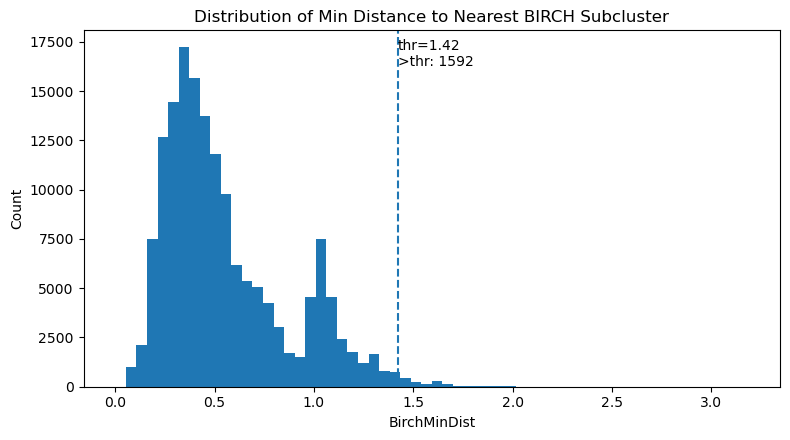

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plot_birch_distance_hist(df, dist_col="BirchMinDist", thr=None, bins=60):
    d = df[dist_col].dropna().to_numpy()
    plt.figure(figsize=(8,4.5))
    plt.hist(d, bins=bins)
    if thr is not None:
        plt.axvline(thr, linestyle="--")
        # annotate how many are beyond thr
        n_out = int((d > thr).sum())
        plt.text(thr, plt.ylim()[1]*0.9, f"thr={thr:.3g}\n>thr: {n_out}", ha="left")
    plt.title("Distribution of Min Distance to Nearest BIRCH Subcluster")
    plt.xlabel(dist_col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

plot_birch_distance_hist(DF_4, dist_col="BirchMinDist", thr=birch_thr)


In [16]:
DF_4

,Class,Flow ID,Source IP,Destination IP,Timestamp,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,...,Flow IAT Min_missing,Bwd IAT Mean_missing,Fwd Header Length_missing,Bwd Header Length_missing,Fwd Header Length.1_missing,Fwd Avg Bytes/Bulk_missing,Init_Win_bytes_forward_missing,min_seg_size_forward_missing,BirchMinDist,outlier_label
0,Benign,10.42.0.1-10.42.0.42-53-57265-17,10.42.0.42,10.42.0.1,02/07/2017 08:20:44,98470.0,0.873875,0.000812,1.000000,0.004549,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.406611,0
1,Trojan,10.42.0.1-10.42.0.42-53-17935-17,10.42.0.42,10.42.0.1,14/07/2017 12:22:19,57471.0,0.273691,0.000812,1.000000,0.005264,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.300864,0
2,Trojan,10.42.0.42-106.39.162.36-32973-80-6,10.42.0.42,106.39.162.36,17/07/2017 02:27:17,78607.0,0.503174,0.001226,0.352941,0.082921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.380257,0
3,Trojan,10.42.0.211-103.235.46.211-33302-443-6,10.42.0.211,103.235.46.211,11/07/2017 09:14:59,248.0,0.508195,0.006788,0.352941,0.187042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.550893,0
4,Trojan,10.42.0.42-77.234.44.43-55580-80-6,10.42.0.42,77.234.44.43,17/07/2017 02:48:17,79487.0,0.848161,0.001226,0.352941,0.354473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.003272,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159728,Benign,172.217.10.14-10.42.0.42-443-45453-17,10.42.0.42,172.217.10.14,05/07/2017 11:06:22,171183.0,0.693621,0.006788,1.000000,0.003101,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.211997,0
159729,Trojan,10.42.0.42-77.234.40.70-36506-80-6,77.234.40.70,10.42.0.42,14/07/2017 02:34:41,64972.0,0.001221,0.559333,0.352941,0.000054,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.553084,0
159730,Trojan,10.42.0.211-23.197.38.151-57928-80-6,10.42.0.211,23.197.38.151,11/07/2017 05:01:11,33506.0,0.883992,0.001226,0.352941,0.000360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.521859,0
159731,Benign,172.217.10.142-10.42.0.42-443-48425-17,10.42.0.42,172.217.10.142,02/07/2017 11:24:34,103351.0,0.738975,0.006788,1.000000,0.002495,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.352879,0


### Technique 2b: Normalize (After Outlier Detection)

In [17]:
cols_to_ignore = ["Class", "Flow ID", "Source IP", "Destination IP", "Timestamp", "Unnamed: 0"]

DF_5, scaler = minmax_normalize(
    DF_4,
    cols_to_ignore=cols_to_ignore,
    feature_range=(0, 1)
)

DF_5.head()

,Class,Flow ID,Source IP,Destination IP,Timestamp,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,...,Flow IAT Min_missing,Bwd IAT Mean_missing,Fwd Header Length_missing,Bwd Header Length_missing,Fwd Header Length.1_missing,Fwd Avg Bytes/Bulk_missing,Init_Win_bytes_forward_missing,min_seg_size_forward_missing,BirchMinDist,outlier_label
0,Benign,10.42.0.1-10.42.0.42-53-57265-17,10.42.0.42,10.42.0.1,02/07/2017 08:20:44,98470.0,0.873875,0.000812,1.000000,0.004549,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.127584,0.0
1,Trojan,10.42.0.1-10.42.0.42-53-17935-17,10.42.0.42,10.42.0.1,14/07/2017 12:22:19,57471.0,0.273691,0.000812,1.000000,0.005264,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.094403,0.0
2,Trojan,10.42.0.42-106.39.162.36-32973-80-6,10.42.0.42,106.39.162.36,17/07/2017 02:27:17,78607.0,0.503174,0.001226,0.352941,0.082921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119315,0.0
3,Trojan,10.42.0.211-103.235.46.211-33302-443-6,10.42.0.211,103.235.46.211,11/07/2017 09:14:59,248.0,0.508195,0.006788,0.352941,0.187042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172856,0.0
4,Trojan,10.42.0.42-77.234.44.43-55580-80-6,10.42.0.42,77.234.44.43,17/07/2017 02:48:17,79487.0,0.848161,0.001226,0.352941,0.354473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.314801,0.0


In [18]:
DF_5.to_csv('DF_5.csv')

## dimensionality reduction

In [19]:
import pandas as pd
from sklearn.decomposition import PCA

# Separate features and labels
cols_to_ignore = ["Class", "Flow ID", "Source IP", "Destination IP", "Timestamp", "Unnamed: 0"]

X = DF_5.select_dtypes(include="number").copy()
for c in cols_to_ignore:
    if c in X.columns:
        X.drop(columns=c, inplace=True)

In [47]:
# === TRAIN TIME (on DF_5) =========================================
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.decomposition import PCA

ignore = {"Class","Flow ID","Source IP","Destination IP","Timestamp","Unnamed: 0"}
num_cols = [c for c in DF_5.select_dtypes(include="number").columns if c not in ignore]

X_train = DF_5[num_cols].copy()

pca = PCA(n_components=0.99, random_state=42)
X_train_pca = pca.fit_transform(X_train)

dump(pca, "pca_fitted.joblib")
dump(num_cols, "pca_num_cols.joblib")

pc_names = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
DF_6 = pd.DataFrame(X_train_pca, columns=pc_names, index=DF_5.index)

print("Original numeric features:", len(num_cols))
print("Reduced PCA features    :", X_train_pca.shape[1])
print("Variance retained       :", round(pca.explained_variance_ratio_.sum(), 3))


Original numeric features: 93
Reduced PCA features    : 28
Variance retained       : 0.99


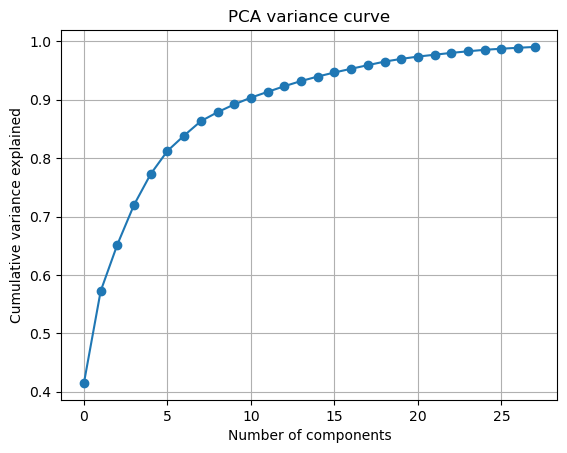

In [21]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative variance explained")
plt.title("PCA variance curve")
plt.grid(True)
plt.show()


In [51]:
from joblib import dump
import pandas as pd

# Columns used in PCA training
ignore = {"Class","Flow ID","Source IP","Destination IP","Timestamp","Unnamed: 0"}
num_cols = [c for c in DF_5.select_dtypes(include="number").columns if c not in ignore]

# Compute column means from training data
train_means = DF_5[num_cols].mean()

# Save both
dump(train_means, "pca_train_means.joblib")
dump(num_cols, "pca_num_cols.joblib")

print("Saved pca_train_means.joblib and pca_num_cols.joblib successfully.")


Saved pca_train_means.joblib and pca_num_cols.joblib successfully.


# CLASSIFIERS

In [22]:
DF_7 = pd.DataFrame({
    "Class": DF_5["Class"].map({"Benign": 0, "Trojan": 1}).astype(int)
})
Summary = {}

### Classification Technique: LogisticRegression

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, average_precision_score
)

# --- Use your PCA results (already created)
X = DF_6.copy()            # PCA features
y = DF_7["Class"] if "Class" in DF_7.columns else DF_7  # handle Series or DF case

# --- Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# --- Train logistic regression
logreg = LogisticRegression(
    solver="saga",
    penalty="l2",
    C=1.0,
    max_iter=4000,
    class_weight="balanced",
    random_state=42
)
logreg.fit(X_train, y_train)

# --- Predictions & probabilities
y_score = logreg.predict_proba(X_test)[:, 1]
y_pred = (y_score >= 0.5).astype(int)

# --- Metrics
acc = accuracy_score(y_test, y_pred)

print("=== Logistic Regression (on PCA features) ===")
print(classification_report(y_test, y_pred, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Accuracy: {acc:.4f}")


# --- Add predictions to DF_7 (align indices properly)
# Create a copy so you don’t overwrite your original labels
DF_7 = DF_7.copy()
DF_7.loc[y_test.index, "Logistic Regression Output"] = y_pred

# --- Record summary
Summary = {}
Summary["Logistic Regression"] = {
    "Accuracy": acc
}

print("\n=== Summary dictionary ===")
print(Summary)


=== Logistic Regression (on PCA features) ===
              precision    recall  f1-score   support

           0     0.5203    0.6545    0.5797     15617
           1     0.5613    0.4228    0.4823     16330

    accuracy                         0.5361     31947
   macro avg     0.5408    0.5387    0.5310     31947
weighted avg     0.5413    0.5361    0.5299     31947

Confusion matrix:
 [[10222  5395]
 [ 9426  6904]]
Accuracy: 0.5361

=== Summary dictionary ===
{'Logistic Regression': {'Accuracy': 0.536075374839578}}


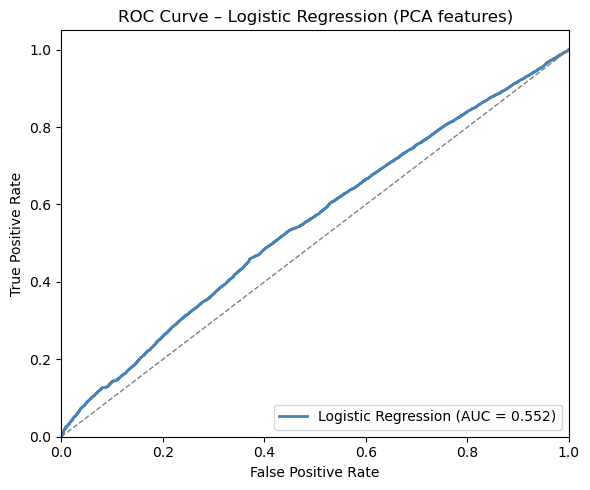


AUC: 0.5516


In [25]:
from sklearn.metrics import roc_curve, auc

# --- Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# --- Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='steelblue', lw=2,
         label=f"Logistic Regression (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression (PCA features)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# --- Optionally add to your summary
Summary["Logistic Regression"]["AUC"] = roc_auc
print(f"\nAUC: {roc_auc:.4f}")


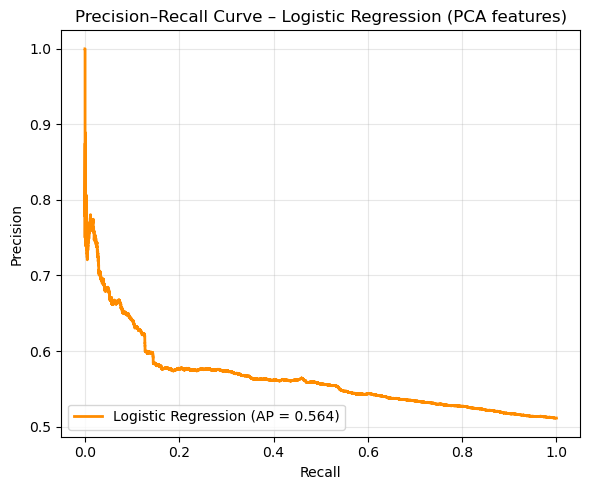

Average Precision (AP): 0.5645


In [26]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# --- Compute Precision–Recall curve and Average Precision (AP)
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_score)
avg_prec = average_precision_score(y_test, y_score)

# --- Plot PR curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color="darkorange", lw=2,
         label=f"Logistic Regression (AP = {avg_prec:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Logistic Regression (PCA features)")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Add to summary
Summary["Logistic Regression"]["Average Precision"] = avg_prec
print(f"Average Precision (AP): {avg_prec:.4f}")


### Classification Technique: Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

dt_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)

print("=== Decision Tree Classification Report ===")
print(classification_report(y_test, y_pred_dt, digits=4))
print(f"Accuracy: {acc_dt:.4f}")

DF_7 = DF_7.copy()
DF_7.loc[y_test.index, "Decision Tree Output"] = y_pred_dt

if "Summary" not in locals():
    Summary = {}
Summary["Decision Tree"] = {"Accuracy": acc_dt}

print("\n=== Updated Summary ===")
print(Summary)


=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

           0     0.6407    0.6421    0.6414     15617
           1     0.6570    0.6557    0.6563     16330

    accuracy                         0.6490     31947
   macro avg     0.6488    0.6489    0.6489     31947
weighted avg     0.6490    0.6490    0.6490     31947

Accuracy: 0.6490

=== Updated Summary ===
{'Logistic Regression': {'Accuracy': 0.536075374839578, 'AUC': 0.551641880201757, 'Average Precision': 0.5644641851080614}, 'Decision Tree': {'Accuracy': 0.6490124268319404}}


## Naïve Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred_nb)

print("=== Naive Bayes Classification Report ===")
print(classification_report(y_test, y_pred_nb, digits=4))
print(f"Accuracy: {acc_nb:.4f}")

# --- Add predictions to DF_7 (aligned by test index)
DF_7 = DF_7.copy()
DF_7.loc[y_test.index, "Naive Bayes Output"] = y_pred_nb

# --- Update Summary dictionary
if "Summary" not in locals():
    Summary = {}
Summary["Naive Bayes"] = {"Accuracy": acc_nb}

print("\n=== Updated Summary ===")
print(Summary)


=== Naive Bayes Classification Report ===
              precision    recall  f1-score   support

           0     0.5008    0.7976    0.6153     15617
           1     0.5532    0.2396    0.3344     16330

    accuracy                         0.5124     31947
   macro avg     0.5270    0.5186    0.4748     31947
weighted avg     0.5276    0.5124    0.4717     31947

Accuracy: 0.5124

=== Updated Summary ===
{'Logistic Regression': {'Accuracy': 0.536075374839578, 'AUC': 0.551641880201757, 'Average Precision': 0.5644641851080614}, 'Decision Tree': {'Accuracy': 0.6490124268319404}, 'Naive Bayes': {'Accuracy': 0.5123798791748834}}


## Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import pandas as pd

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=300, max_depth=None, n_jobs=-1,
    class_weight="balanced", random_state=42
)
rf.fit(Xtr, ytr)
pred  = rf.predict(Xte)
proba = rf.predict_proba(Xte)[:, 1]

print("=== RandomForest ===")
print(classification_report(yte, pred, digits=4))
print("ROC AUC:", roc_auc_score(yte, proba))

acc_rf = accuracy_score(yte, pred)
print(f"Accuracy: {acc_rf:.4f}")

if isinstance(DF_7, pd.Series):
    DF_7 = DF_7.to_frame(name="Class")
DF_7 = DF_7.copy()
DF_7.loc[yte.index, "Random Forest Output"] = pred

if "Summary" not in locals():
    Summary = {}
Summary["Random Forest"] = {"Accuracy": acc_rf}

print("\n=== Updated Summary ===")
print(Summary)


=== RandomForest ===
              precision    recall  f1-score   support

           0     0.6769    0.6907    0.6837     15617
           1     0.6983    0.6848    0.6915     16330

    accuracy                         0.6876     31947
   macro avg     0.6876    0.6877    0.6876     31947
weighted avg     0.6879    0.6876    0.6877     31947

ROC AUC: 0.7668633514885035
Accuracy: 0.6876

=== Updated Summary ===
{'Logistic Regression': {'Accuracy': 0.536075374839578, 'AUC': 0.551641880201757, 'Average Precision': 0.5644641851080614}, 'Decision Tree': {'Accuracy': 0.6490124268319404}, 'Naive Bayes': {'Accuracy': 0.5123798791748834}, 'Random Forest': {'Accuracy': 0.6876389019313237}}


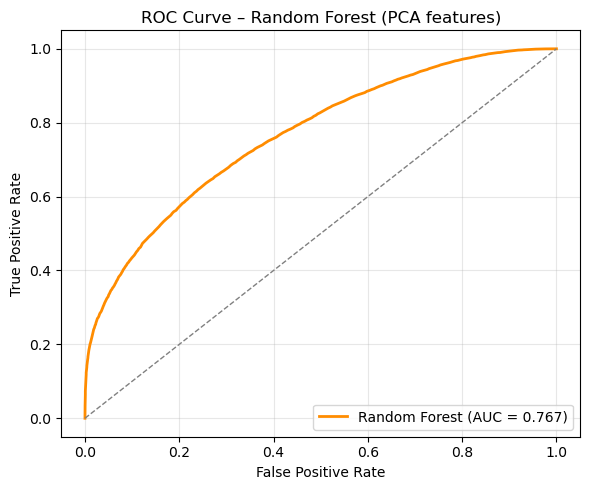

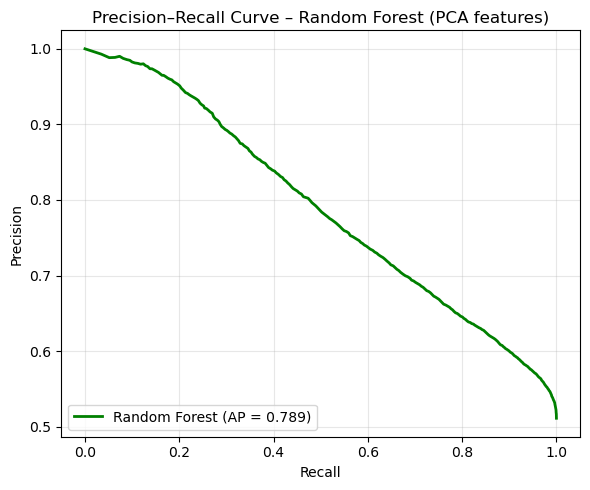

In [38]:
# --- ROC Curve ---
fpr, tpr, _ = roc_curve(yte, proba)
roc_auc = roc_auc_score(yte, proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"Random Forest (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest (PCA features)")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# --- Precision–Recall Curve ---
prec, rec, _ = precision_recall_curve(yte, proba)
avg_prec = average_precision_score(yte, proba)

plt.figure(figsize=(6, 5))
plt.plot(rec, prec, color="green", lw=2,
         label=f"Random Forest (AP = {avg_prec:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Random Forest (PCA features)")
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## KNN
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve, auc,
    precision_recall_curve, average_precision_score
)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Scale for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Train KNN
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance",
    metric="minkowski",
    n_jobs=-1
)
knn.fit(X_train_scaled, y_train)

# Predict
y_score = knn.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_score >= 0.5).astype(int)

# Metrics
print("=== K-Nearest Neighbors (PCA features) ===")
print(classification_report(y_test, y_pred, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", round(roc_auc_score(y_test, y_score), 4))
print("PR  AUC:", round(average_precision_score(y_test, y_score), 4))

acc_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_knn:.4f}")

if isinstance(DF_7, pd.Series):
    DF_7 = DF_7.to_frame(name="Class")
DF_7 = DF_7.copy()
DF_7.loc[y_test.index, "KNN Output"] = y_pred

# --- Update Summary dict
if "Summary" not in locals():
    Summary = {}
Summary["KNN"] = {"Accuracy": acc_knn}

print("\n=== Updated Summary ===")
print(Summary)



=== K-Nearest Neighbors (PCA features) ===
              precision    recall  f1-score   support

           0     0.6579    0.6842    0.6708     15617
           1     0.6860    0.6597    0.6726     16330

    accuracy                         0.6717     31947
   macro avg     0.6719    0.6719    0.6717     31947
weighted avg     0.6722    0.6717    0.6717     31947

Confusion matrix:
 [[10685  4932]
 [ 5557 10773]]
ROC AUC: 0.7427
PR  AUC: 0.7469
Accuracy: 0.6717

=== Updated Summary ===
{'Logistic Regression': {'Accuracy': 0.536075374839578, 'AUC': 0.551641880201757, 'Average Precision': 0.5644641851080614}, 'Decision Tree': {'Accuracy': 0.6490124268319404}, 'Naive Bayes': {'Accuracy': 0.5123798791748834}, 'Random Forest': {'Accuracy': 0.6876389019313237}, 'KNN': {'Accuracy': 0.6716749616552415}}


In [31]:
# --- Logistic Regression ---
DF_7.loc[y_train.index, "Logistic Regression Output"] = logreg.predict(X_train)
DF_7.loc[y_test.index,  "Logistic Regression Output"] = y_pred  # from your previous test

# --- Decision Tree (standard) ---
DF_7.loc[y_train.index, "Decision Tree Output"] = dt_model.predict(X_train)
DF_7.loc[y_test.index,  "Decision Tree Output"] = y_pred_dt

# --- Naive Bayes ---
DF_7.loc[y_train.index, "Naive Bayes Output"] = nb_model.predict(X_train)
DF_7.loc[y_test.index,  "Naive Bayes Output"] = y_pred_nb

# --- Random Forest ---
DF_7.loc[y_train.index, "Random Forest Output"] = rf.predict(X_train)
DF_7.loc[y_test.index,  "Random Forest Output"] = pred

# --- KNN (scaled inputs) ---
DF_7.loc[y_train.index, "KNN Output"] = knn.predict(X_train_scaled)
DF_7.loc[y_test.index,  "KNN Output"] = y_pred

DF_7

,Class,Logistic Regression Output,Decision Tree Output,Naive Bayes Output,Random Forest Output,KNN Output
0,0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,1.0,0.0,1.0,1.0
2,1,1.0,1.0,1.0,1.0,1.0
3,1,0.0,1.0,0.0,0.0,0.0
4,1,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
159728,0,0.0,0.0,0.0,0.0,0.0
159729,1,0.0,1.0,0.0,1.0,1.0
159730,1,0.0,1.0,0.0,1.0,1.0
159731,0,0.0,0.0,1.0,0.0,0.0


In [33]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

meta_features = [
    "Decision Tree Output",
    "Random Forest Output",
    "KNN Output"
]

X_meta = DF_7[meta_features].copy()
y_meta = DF_7["Class"].astype(int)

# drop any incomplete rows
X_meta = X_meta.dropna()
y_meta = y_meta.loc[X_meta.index]


In [34]:
from sklearn.model_selection import train_test_split
X_meta_train, X_meta_test, y_meta_train, y_meta_test = train_test_split(
    X_meta, y_meta, stratify=y_meta, test_size=0.2, random_state=42
)


In [35]:
weights = {
    "Decision Tree Output": Summary["Decision Tree"]["Accuracy"],
    "Random Forest Output": Summary["Random Forest"]["Accuracy"],
    "KNN Output": Summary["KNN"]["Accuracy"]
}

# Apply weights (if desired)
for col, w in weights.items():
    X_meta_train[col] *= w
    X_meta_test[col]  *= w

# Meta model (logistic regression stacker)
stacker = LogisticRegression(
    solver="saga", penalty="l2", C=1.0, max_iter=4000, random_state=42
)
stacker.fit(X_meta_train, y_meta_train)

# Evaluate
y_meta_pred = stacker.predict(X_meta_test)
y_meta_proba = stacker.predict_proba(X_meta_test)[:, 1]

print("=== Ensemble Meta-Model Results ===")
print(classification_report(y_meta_test, y_meta_pred, digits=4))
print("Accuracy:", round(accuracy_score(y_meta_test, y_meta_pred), 4))
print("ROC AUC :", round(roc_auc_score(y_meta_test, y_meta_proba), 4))


=== Ensemble Meta-Model Results ===
              precision    recall  f1-score   support

           0     0.6706    0.6894    0.6799     15617
           1     0.6948    0.6761    0.6853     16330

    accuracy                         0.6826     31947
   macro avg     0.6827    0.6828    0.6826     31947
weighted avg     0.6830    0.6826    0.6827     31947

Accuracy: 0.6826
ROC AUC : 0.7223


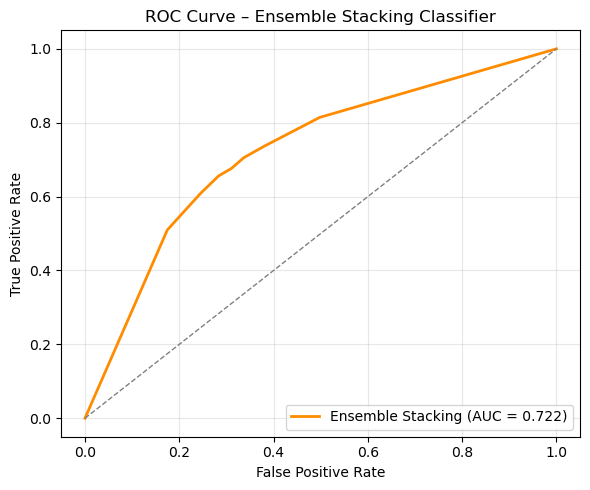

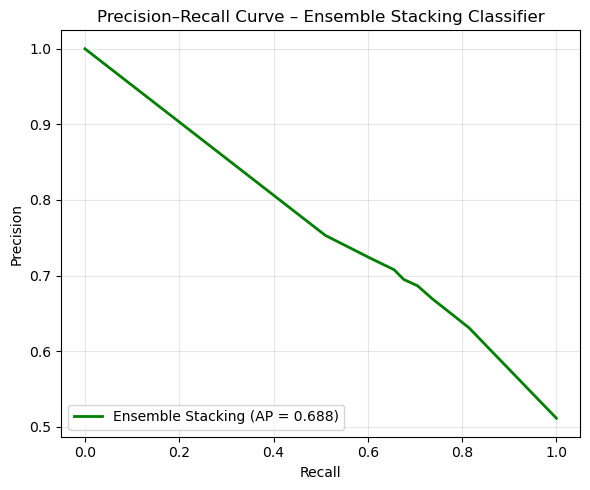

<Figure size 640x480 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, roc_auc_score

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_meta_test, y_meta_proba)
roc_auc = roc_auc_score(y_meta_test, y_meta_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"Ensemble Stacking (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Ensemble Stacking Classifier")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# --- Precision–Recall Curve ---
prec, rec, _ = precision_recall_curve(y_meta_test, y_meta_proba)
avg_prec = average_precision_score(y_meta_test, y_meta_proba)

plt.figure(figsize=(6, 5))
plt.plot(rec, prec, color="green", lw=2,
         label=f"Ensemble Stacking (AP = {avg_prec:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Ensemble Stacking Classifier")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.savefig("ROC_ensemble.png", dpi=300, bbox_inches="tight")
plt.savefig("PR_ensemble.png", dpi=300, bbox_inches="tight")


In [36]:
DF_7 = DF_7.copy()
DF_7.loc[X_meta_test.index, "Ensemble Output"] = y_meta_pred

acc_ensemble = accuracy_score(y_meta_test, y_meta_pred)
roc_ensemble = roc_auc_score(y_meta_test, y_meta_proba)

Summary["Ensemble (Stacker)"] = {
    "Accuracy": acc_ensemble
}

print("\n=== Updated Summary ===")
print(Summary)


=== Updated Summary ===
{'Logistic Regression': {'Accuracy': 0.536075374839578, 'AUC': 0.551641880201757, 'Average Precision': 0.5644641851080614}, 'Decision Tree': {'Accuracy': 0.6490124268319404}, 'Naive Bayes': {'Accuracy': 0.5123798791748834}, 'Random Forest': {'Accuracy': 0.6876389019313237}, 'KNN': {'Accuracy': 0.6716749616552415}, 'Ensemble (Stacker)': {'Accuracy': 0.6826306069427489}}


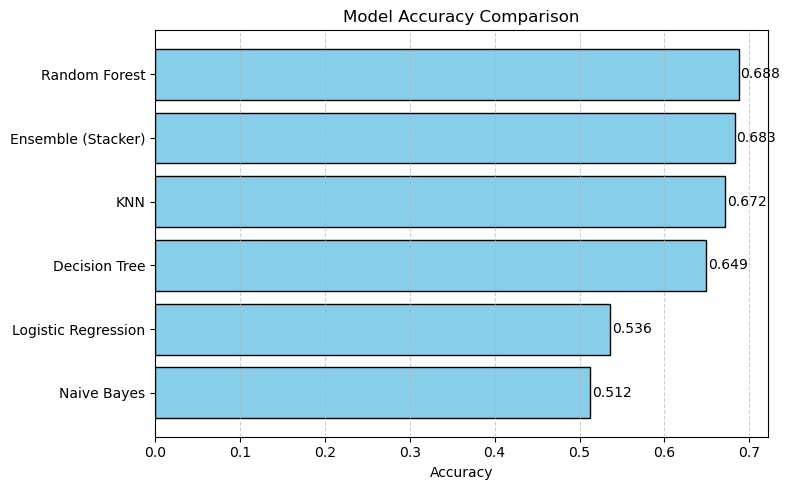

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Convert Summary dict to DataFrame
summary_df = pd.DataFrame(Summary).T  # transpose so models are rows
summary_df = summary_df.sort_values("Accuracy", ascending=False)

# --- Plot
plt.figure(figsize=(8, 5))
plt.barh(summary_df.index, summary_df["Accuracy"], color="skyblue", edgecolor="black")
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.gca().invert_yaxis()  # highest accuracy at top
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Show accuracy labels on bars
for i, v in enumerate(summary_df["Accuracy"]):
    plt.text(v + 0.002, i, f"{v:.3f}", va="center")

plt.tight_layout()
plt.show()


# TEST DATA

In [44]:
import pandas as pd

test_data_df = pd.read_csv("test_data.csv")
print(test_data_df.shape)
test_data_df.columns = test_data_df.columns.str.strip()

tDF_1 = replace_neg1_with_na(test_data_df)
tDF_2 = tDF_1.drop(columns=["Init_Win_bytes_backward"])

tDF_2 = add_missing_flags_and_impute(tDF_2)


# Select numeric features only
df_num = tDF_2.select_dtypes(include="number").copy()

z_scores = np.abs((df_num - df_num.mean()) / df_num.std(ddof=0))

threshold = 3

outlier_mask = (np.abs((df_num - df_num.mean()) / df_num.std(ddof=0)) > threshold)

for col in df_num.columns:
    tDF_2[col + "_outlier"] = outlier_mask[col].astype(int)

for col in df_num.columns:
    mean_val = df_num[col].mean()
    tDF_2.loc[outlier_mask[col], col] = mean_val

cols_to_ignore =  ["Unnamed: 0"]

tDF_3, scaler = minmax_normalize(
    df_num,
    cols_to_ignore=cols_to_ignore,
    feature_range=(0, 1)
)

cols_to_add_back = ["Flow ID", "Source IP", "Destination IP", "Timestamp"]

tDF_3 = pd.concat([tDF_2[cols_to_add_back], tDF_3], axis=1)
tDF_3

(17749, 85)


C:\Users\mjpon\AppData\Local\Temp\ipykernel_37316\9168752.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tDF_2[col + "_outlier"] = outlier_mask[col].astype(int)
C:\Users\mjpon\AppData\Local\Temp\ipykernel_37316\9168752.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tDF_2[col + "_outlier"] = outlier_mask[col].astype(int)
C:\Users\mjpon\AppData\Local\Temp\ipykernel_37316\9168752.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

,Flow ID,Source IP,Destination IP,Timestamp,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,...,Total Backward Packets_missing,Total Length of Fwd Packets_missing,Fwd Packet Length Max_missing,Fwd Packet Length Min_missing,Flow IAT Min_missing,Bwd IAT Mean_missing,Fwd Header Length_missing,Fwd Avg Bytes/Bulk_missing,Init_Win_bytes_forward_missing,min_seg_size_forward_missing
0,10.42.0.211-54.192.38.7-57923-443-6,10.42.0.211,54.192.38.7,11/07/2017 12:04:30,13045.0,0.885822,0.006906,0.352941,4.695371e-02,0.044362,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,192.229.173.173-10.42.0.211-80-45539-6,10.42.0.211,192.229.173.173,11/07/2017 05:52:34,38128.0,0.696432,0.001247,0.352941,7.581482e-02,0.000677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.42.0.42-63.250.200.63-38597-443-6,10.42.0.42,63.250.200.63,14/07/2017 11:20:52,53624.0,0.590267,0.006906,0.352941,9.612486e-01,0.004402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.42.0.1-10.42.0.42-53-43747-17,10.42.0.42,10.42.0.1,30/06/2017 07:16:27,96623.0,0.669027,0.000826,1.000000,3.492061e-04,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,172.217.6.206-10.42.0.42-443-49161-6,10.42.0.42,172.217.6.206,14/07/2017 02:29:32,64241.0,0.751824,0.006906,0.352941,3.067109e-04,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17744,203.205.158.62-10.42.0.42-80-38578-6,10.42.0.42,203.205.158.62,02/07/2017 12:29:21,105448.0,0.589977,0.001247,0.352941,2.501230e-01,0.002709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17745,10.42.0.42-121.14.255.82-37292-80-6,121.14.255.82,10.42.0.42,17/07/2017 03:34:59,83742.0,0.001223,0.581388,0.352941,2.103922e-05,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17746,202.77.129.54-10.42.0.151-80-37863-6,10.42.0.151,202.77.129.54,05/07/2017 05:42:01,164031.0,0.579042,0.001247,0.352941,5.043133e-01,0.000339,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17747,157.240.2.20-10.42.0.42-443-57853-6,10.42.0.42,157.240.2.20,14/07/2017 01:30:15,60274.0,0.884751,0.006906,0.352941,4.751330e-07,0.000339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

def birch_transform_new(df_new, birch_model, thr, feature_cols, scaler=None, pca=None):
    df_out = df_new.copy()

    # 1) Build numeric matrix with the exact training columns
    X_new = df_out.reindex(columns=feature_cols)  # add missing cols as NaN, drop extras
    # If any missing -> fill with 0 (safe if you standardized earlier; mean≈0)
    X_new = X_new.fillna(0).to_numpy(dtype=float)

    # 2) Apply the SAME preprocessing you used before fitting BIRCH
    if scaler is not None:
        X_new = scaler.transform(X_new)
    if pca is not None:
        X_new = pca.transform(X_new)

    # 3) Compute min distance to BIRCH subcluster centers learned on train
    centers = birch_model.subcluster_centers_
    d_new = cdist(X_new, centers).min(axis=1)

    # 4) Flag outliers using the TRAIN-derived threshold
    out_flag = (d_new > thr).astype(int)

    # 5) Attach to dataframe
    df_out["BirchMinDist"] = d_new
    df_out["outlier_label"] = out_flag
    return df_out

tDF_4 = birch_transform_new(
    df_new= tDF_3,
    birch_model=birch_model,
    thr=birch_thr,
    feature_cols=feature_cols,
    scaler=None, 
    pca=None      
)
tDF_4

,Flow ID,Source IP,Destination IP,Timestamp,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,...,Fwd Packet Length Max_missing,Fwd Packet Length Min_missing,Flow IAT Min_missing,Bwd IAT Mean_missing,Fwd Header Length_missing,Fwd Avg Bytes/Bulk_missing,Init_Win_bytes_forward_missing,min_seg_size_forward_missing,BirchMinDist,outlier_label
0,10.42.0.211-54.192.38.7-57923-443-6,10.42.0.211,54.192.38.7,11/07/2017 12:04:30,13045.0,0.885822,0.006906,0.352941,4.695371e-02,0.044362,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.077090,0
1,192.229.173.173-10.42.0.211-80-45539-6,10.42.0.211,192.229.173.173,11/07/2017 05:52:34,38128.0,0.696432,0.001247,0.352941,7.581482e-02,0.000677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.403180,0
2,10.42.0.42-63.250.200.63-38597-443-6,10.42.0.42,63.250.200.63,14/07/2017 11:20:52,53624.0,0.590267,0.006906,0.352941,9.612486e-01,0.004402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.939552,0
3,10.42.0.1-10.42.0.42-53-43747-17,10.42.0.42,10.42.0.1,30/06/2017 07:16:27,96623.0,0.669027,0.000826,1.000000,3.492061e-04,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.248331,0
4,172.217.6.206-10.42.0.42-443-49161-6,10.42.0.42,172.217.6.206,14/07/2017 02:29:32,64241.0,0.751824,0.006906,0.352941,3.067109e-04,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.419251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17744,203.205.158.62-10.42.0.42-80-38578-6,10.42.0.42,203.205.158.62,02/07/2017 12:29:21,105448.0,0.589977,0.001247,0.352941,2.501230e-01,0.002709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.544386,0
17745,10.42.0.42-121.14.255.82-37292-80-6,121.14.255.82,10.42.0.42,17/07/2017 03:34:59,83742.0,0.001223,0.581388,0.352941,2.103922e-05,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.576724,0
17746,202.77.129.54-10.42.0.151-80-37863-6,10.42.0.151,202.77.129.54,05/07/2017 05:42:01,164031.0,0.579042,0.001247,0.352941,5.043133e-01,0.000339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.606431,1
17747,157.240.2.20-10.42.0.42-443-57853-6,10.42.0.42,157.240.2.20,14/07/2017 01:30:15,60274.0,0.884751,0.006906,0.352941,4.751330e-07,0.000339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.338394,0


In [52]:
from joblib import load
import numpy as np
import pandas as pd

pca       = load("pca_fitted.joblib")
num_cols  = load("pca_num_cols.joblib")
train_means = load("pca_train_means.joblib")   # <- load saved means

# Build X_new aligned to training columns
ID_COLS = ["Class","Flow ID","Source IP","Destination IP","Timestamp","Unnamed: 0"]
X_new = tDF_4.drop(columns=[c for c in ID_COLS if c in tDF_4.columns], errors="ignore").copy()
for c in num_cols:
    if c not in X_new.columns:
        X_new[c] = np.nan
X_new = X_new[num_cols].apply(pd.to_numeric, errors="coerce")

X_new = X_new.replace([np.inf, -np.inf], np.nan)
X_new = X_new.fillna(train_means)

n_na = X_new.isna().sum().sum()
assert n_na == 0, f"Still have {n_na} NaNs—check columns!"

# Same PCA space as training
X_new_pca = pca.transform(X_new)
pc_names = [f"PC{i+1}" for i in range(X_new_pca.shape[1])]
X_new_pca_df = pd.DataFrame(X_new_pca, columns=pc_names, index=tDF_4.index)


In [54]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# ------------------------------------------------------------
# 0) Get your labeled TRAIN data (PCA features + labels)
#    Assumes:
#      - DF_6 : DataFrame of PCA features for the ORIGINAL labeled dataset
#      - DF_7 : has "Class" or you have y as a Series of 0/1
# ------------------------------------------------------------
X = DF_6.copy()
y = DF_7["Class"] if "Class" in DF_7.columns else DF_7  # handle Series or DF

# Small guard
y = pd.Series(y).astype(int).reindex(X.index)

# ------------------------------------------------------------
# 1) Split to get a validation set for weights + stacker training
# ------------------------------------------------------------
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ------------------------------------------------------------
# 2) Define & train BASE MODELS
#    - KNN is wrapped with StandardScaler (as you used before)
# ------------------------------------------------------------
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
rf       = RandomForestClassifier(
    n_estimators=300, max_depth=None, n_jobs=-1,
    class_weight="balanced", random_state=42
)
knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5, weights="distance"))
])

dt_model.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train)

# 3) VALIDATION predictions (HARD 0/1) + accuracies for weights
pred_dt  = dt_model.predict(X_valid)
pred_rf  = rf.predict(X_valid)
pred_knn = knn_pipe.predict(X_valid)

acc_dt  = accuracy_score(y_valid, pred_dt)
acc_rf  = accuracy_score(y_valid, pred_rf)
acc_knn = accuracy_score(y_valid, pred_knn)

Summary = {
    "Decision Tree": {"Accuracy": acc_dt},
    "Random Forest": {"Accuracy": acc_rf},
    "KNN":           {"Accuracy": acc_knn},
}
print("=== Base model validation accuracies ===")
print(Summary)

# ------------------------------------------------------------
# 4) Build META features on the validation split (your original style)
#    Then train the stacker on these meta-features.
# ------------------------------------------------------------
X_meta_train = pd.DataFrame({
    "Decision Tree Output": pred_dt.astype(float),
    "Random Forest Output": pred_rf.astype(float),
    "KNN Output":           pred_knn.astype(float)
}, index=X_valid.index)

# Apply accuracy-based weights (normalized or raw—your original used raw; both are fine)
weights = {
    "Decision Tree Output": Summary["Decision Tree"]["Accuracy"],
    "Random Forest Output": Summary["Random Forest"]["Accuracy"],
    "KNN Output":           Summary["KNN"]["Accuracy"]
}
for col, w in weights.items():
    X_meta_train[col] *= w

stacker = LogisticRegression(
    solver="saga", penalty="l2", C=1.0, max_iter=4000, random_state=42
)
stacker.fit(X_meta_train, y_valid)

# Optional: quick validation of meta-model (on the same validation split)
y_meta_proba_val = stacker.predict_proba(X_meta_train)[:, 1]
y_meta_pred_val  = (y_meta_proba_val >= 0.5).astype(int)
print("\n=== Meta-model (validation) ===")
print(classification_report(y_valid, y_meta_pred_val, digits=4))
print("Accuracy:", round(accuracy_score(y_valid, y_meta_pred_val), 4))
try:
    print("ROC AUC :", round(roc_auc_score(y_valid, y_meta_proba_val), 4))
except Exception:
    pass

# OPTIONAL (stronger inference models): refit base models on ALL labeled data
dt_model.fit(X, y)
rf.fit(X, y)
knn_pipe.fit(X, y)

# ------------------------------------------------------------
# 5) INFERENCE on your unlabeled test set
#    Assumes you already built: X_new_pca_df from test_data_df via the SAME PCA
# ------------------------------------------------------------
assert 'X_new_pca_df' in globals(), "Missing X_new_pca_df — run your PCA transform first."

pred_dt_new  = dt_model.predict(X_new_pca_df.values)
pred_rf_new  = rf.predict(X_new_pca_df.values)
pred_knn_new = knn_pipe.predict(X_new_pca_df.values)

X_meta_test = pd.DataFrame({
    "Decision Tree Output": pred_dt_new.astype(float),
    "Random Forest Output": pred_rf_new.astype(float),
    "KNN Output":           pred_knn_new.astype(float)
}, index=X_new_pca_df.index)

# Apply the SAME weights
for col, w in weights.items():
    X_meta_test[col] *= w

# Final ensemble predictions
y_meta_proba = stacker.predict_proba(X_meta_test)[:, 1]
y_meta_pred  = (y_meta_proba >= 0.5).astype(int)

# Attach to original test_data_df
label_map = {0: "Benign", 1: "Trojan"}
test_out = test_data_df.copy()
test_out["Ensemble_Pred_Label"]       = pd.Series(y_meta_pred, index=test_out.index).map(label_map)
test_out["Ensemble_Pred_Prob_Trojan"] = y_meta_proba

# Save
print(test_out[["Ensemble_Pred_Label", "Ensemble_Pred_Prob_Trojan"]].head())


=== Base model validation accuracies ===
{'Decision Tree': {'Accuracy': 0.6490124268319404}, 'Random Forest': {'Accuracy': 0.6876389019313237}, 'KNN': {'Accuracy': 0.6716749616552415}}

=== Meta-model (validation) ===
              precision    recall  f1-score   support

           0     0.6706    0.6894    0.6799     15617
           1     0.6948    0.6761    0.6853     16330

    accuracy                         0.6826     31947
   macro avg     0.6827    0.6828    0.6826     31947
weighted avg     0.6830    0.6826    0.6827     31947

Accuracy: 0.6826
ROC AUC : 0.7223


C:\Users\mjpon\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\mjpon\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mjpon\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Saved predictions -> test_predictions_ensemble.csv
  Ensemble_Pred_Label  Ensemble_Pred_Prob_Trojan
0              Benign                   0.400913
1              Trojan                   0.741866
2              Benign                   0.278251
3              Benign                   0.278251
4              Benign                   0.400913


In [55]:
test_out

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Ensemble_Pred_Label,Ensemble_Pred_Prob_Trojan
0,13045,10.42.0.211-54.192.38.7-57923-443-6,10.42.0.211,57923,54.192.38.7,443,6,11/07/2017 12:04:30,5632870,132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0.400913
1,38128,192.229.173.173-10.42.0.211-80-45539-6,10.42.0.211,45539,192.229.173.173,80,6,11/07/2017 05:52:34,9095234,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan,0.741866
2,53624,10.42.0.42-63.250.200.63-38597-443-6,10.42.0.42,38597,63.250.200.63,443,6,14/07/2017 11:20:52,115317542,14,...,135989.0,0.0,135989.0,135989.0,115181093.0,0.0,115181093.0,115181093.0,Benign,0.278251
3,96623,10.42.0.1-10.42.0.42-53-43747-17,10.42.0.42,43747,10.42.0.1,53,17,30/06/2017 07:16:27,41895,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0.278251
4,64241,172.217.6.206-10.42.0.42-443-49161-6,10.42.0.42,49161,172.217.6.206,443,6,14/07/2017 02:29:32,36797,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0.400913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17744,105448,203.205.158.62-10.42.0.42-80-38578-6,10.42.0.42,38578,203.205.158.62,80,6,02/07/2017 12:29:21,30006357,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0.398802
17745,83742,10.42.0.42-121.14.255.82-37292-80-6,121.14.255.82,80,10.42.0.42,37292,6,17/07/2017 03:34:59,2526,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0.400913
17746,164031,202.77.129.54-10.42.0.151-80-37863-6,10.42.0.151,37863,202.77.129.54,80,6,05/07/2017 05:42:01,60500653,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0.398802
17747,60274,157.240.2.20-10.42.0.42-443-57853-6,10.42.0.42,57853,157.240.2.20,443,6,14/07/2017 01:30:15,59,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0.398802


In [56]:
final = test_out["Ensemble_Pred_Label"]
final

0        Benign
1        Trojan
2        Benign
3        Benign
4        Benign
          ...  
17744    Benign
17745    Benign
17746    Benign
17747    Benign
17748    Benign
Name: Ensemble_Pred_Label, Length: 17749, dtype: object

In [57]:
final.to_csv("final_ensemble_predictions.csv", index=False, header=True)